In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'', # insert packages here e.g. r'\usepackage{mathrm}'
    "font.family": "serif",
    "font.serif": "cm",
    "font.size": 10,
    "legend.fontsize": 9
})
# plt.rcParams.update({
#     "text.usetex": True,
#     "text.latex.preamble": r'', # insert packages here e.g. r'\usepackage{mathrm}'
#     "font.family": "serif",
#     "font.serif": "cm",
#     "font.size": 17,
#     "legend.fontsize": 16
# })

figwidth_latex_pt = 246.0
inches_per_pt = 1.0/72.27
golden = (np.sqrt(5)-1.0)/2.0
figwidth = figwidth_latex_pt*inches_per_pt
figheight = figwidth*golden
figsize = (figwidth, figheight)
figsize_mod = (figwidth, figheight*1.07)
figsize_2col = (figwidth*2, figheight*2)
figsize_map = (figwidth, figwidth)

### weak approximation

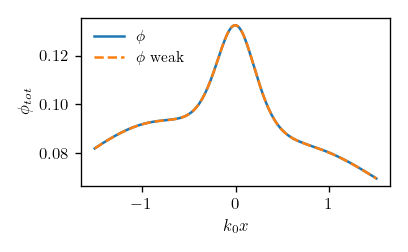

In [3]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_slice.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
phitot = file["phitot"]
weakphitot = file["weakphitot"]

plt.figure(figsize=figsize, dpi=120)
plt.plot(xx, np.abs(phitot[:, 10]), label="$\phi$")
plt.plot(xx, np.abs(weakphitot[:, 10]), '--', label="$\phi$ weak")
plt.xlabel("$k_0x$")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
# list(np.concatenate(deviationavg).flat)

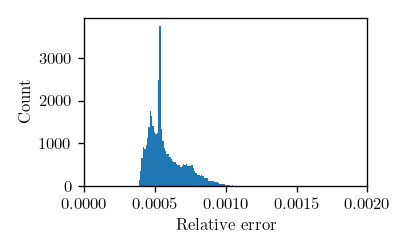

In [5]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins='auto')
plt.xlim((0, 0.002))
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

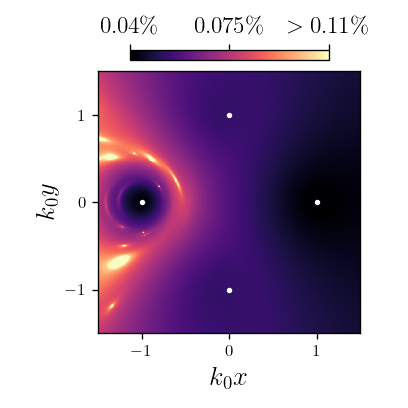

In [6]:
file = np.load("../data/weak_approx_map.npz")
saveplot = "../data/weak_approx_map.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    ax.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = ax.imshow(deviationavg,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.0004,
           vmax=0.0011)
ax.ticklabel_format(scilimits=(0,0))
cbar = fig.colorbar(im, fraction=0.035, pad=0.04, ticks=[0.0004, 0.00075, 0.0011], location="top")
cbar.set_ticklabels(['$0.04\%$', '0.075\%', '$>0.11\%$'], fontsize=14)
plt.xlabel("$k_0x$", fontsize=16)
plt.ylabel("$k_0y$", fontsize=16)
plt.yticks([-1,0,1])
plt.tight_layout()
plt.savefig(saveplot)
plt.show()

### strong approximation

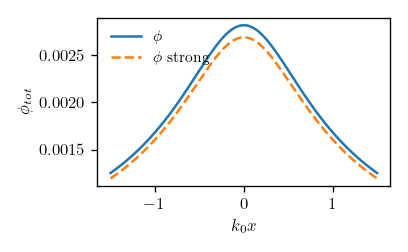

In [7]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_slice.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]
phitot = file["phitot"]
strongphitot = file["strongphitot"]

plt.figure(figsize=figsize, dpi=120)
plt.plot(xx, np.abs(phitot[:, 50]), label="$\phi$")
plt.plot(xx, np.abs(strongphitot[:, 50]), '--', label="$\phi$ strong")
plt.xlabel("$k_0x$")
plt.ylabel("$\phi_{tot}$")
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
# list(np.concatenate(deviationavg).flat)

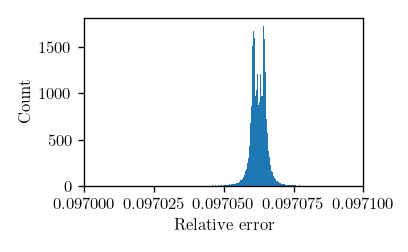

In [9]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_histo.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.hist(list(np.concatenate(deviationavg).flat), bins="auto")
plt.xlim(0.097, 0.0971)
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

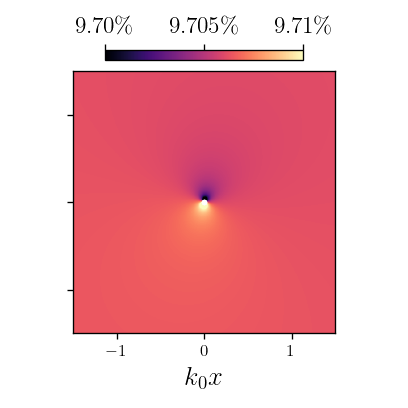

In [10]:
file = np.load("../data/strong_approx_map.npz")
saveplot = "../data/strong_approx_map.pdf"
scattpos = file["scattpos"]
xx = file["xx"]
yy = file["yy"]
deviationavg = file["deviationavg"]

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
plt.gcf().set_facecolor("white") # set white background
for i in range(scattpos.shape[0]):
    ax.scatter(scattpos[i, 0], scattpos[i, 1], c='w', s=5)
im = ax.imshow(deviationavg,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.0970,
           vmax=0.0971)
ax.ticklabel_format(scilimits=(0,0))
cbar = fig.colorbar(im, fraction=0.035, pad=0.04, ticks=[0.0970, 0.09705, 0.0971], location="top")
cbar.set_ticklabels(['9.70\%', '9.705\%', '9.71\%'], fontsize=14)
plt.xlabel("$k_0x$", fontsize=16)
# plt.ylabel("$k_0y$")
plt.yticks([-1,0,1],['', '', ''])
plt.tight_layout()
plt.savefig(saveplot)
p2 = plt.show()

### approximations grid map

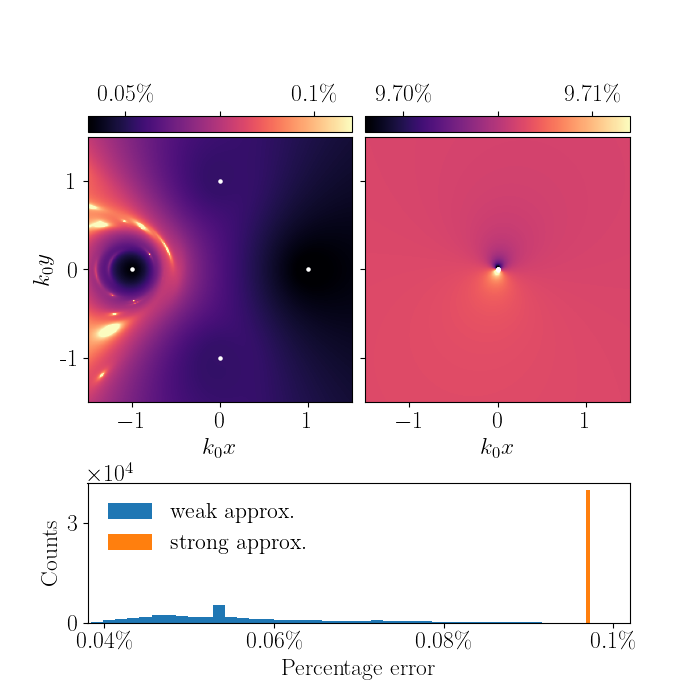

In [293]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

saveplot = "../data/multiplemap.pdf"

file = np.load("../data/weak_approx_map.npz")
xx = file["xx"]
yy = file["yy"]
scattwk = file["scattpos"]
deviationavgwk = file["deviationavg"]
file = np.load("../data/strong_approx_map.npz")
scattst = file["scattpos"]
deviationavgst = file["deviationavg"]

fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(2, 2, width_ratios=(1,1), height_ratios=(2.5,1), wspace=0.05, hspace=0.2)

ax = fig.add_subplot(gs[0,0])
for i in range(scattwk.shape[0]):
    ax.scatter(scattwk[i, 0], scattwk[i, 1], c='w', s=5)
im1 = ax.imshow(deviationavgwk,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.0004,
           vmax=0.0011)
ax.set_xlabel("$k_0x$")
ax.set_ylabel("$k_0y$")
ax.set_yticks([-1,0,1],['-1', '0', '1'])
divider1 = make_axes_locatable(ax)
cax1 = divider1.append_axes("top", size="6%", pad=0.05)
cbar1 = plt.colorbar(im1, cax=cax1, ticks=[0.0005, 0.00075, 0.001], format="%.2f", orientation="horizontal")
cbar1.set_ticklabels(['$0.05\%$', '', '$0.1\%$'])
cax1.xaxis.set_ticks_position("top")

ax = fig.add_subplot(gs[0,1])
for i in range(scattst.shape[0]):
    ax.scatter(scattst[i, 0], scattst[i, 1], c='w', s=5)
im2 = ax.imshow(deviationavgst,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           vmin=0.09698,
           vmax=0.09712)
ax.set_xlabel("$k_0x$")
ax.set_yticks([-1,0,1],['', '', ''])
divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("top", size="6%", pad=0.05)
cbar2 = plt.colorbar(im2, cax=cax2, ticks=[0.0970, 0.09705, 0.0971], format="%.2f", orientation="horizontal")
cbar2.set_ticklabels(['9.70\%', '', '9.71\%'])
cax2.xaxis.set_ticks_position("top")

ax = fig.add_subplot(gs[1,:])
ax.hist(list(np.concatenate(deviationavgwk).flat), bins=400, label="weak approx.")
ax.hist(list(np.concatenate(1e-2*deviationavgst).flat), bins=1, label="strong approx.")
ax.legend(frameon=False, loc="upper left")
ax.set_xlabel("Percentage error")
ax.set_ylabel("Counts")
ax.set_xticks([0.0004, 0.0006, 0.0008, 0.001], ["$0.04\%$", "$0.06\%$", "$0.08\%$", "$0.1\%$"])
ax.set_yticks([0, 30000], ["0", "3"])
ax.text(0, 1.03, "$\\times 10^4$", transform=ax.transAxes)
ax.set_xlim(0.38e-3,1.02e-3)
# ax.ticklabel_format(axis='y', scilimits=(0,4))

# plt.tight_layout()
plt.savefig(saveplot)
plt.show()

### alpha inequality

In [12]:
def lhs(alpha):
    return np.imag(alpha)
def rhs(alpha):
    return np.abs(alpha)**2 /4/np.pi

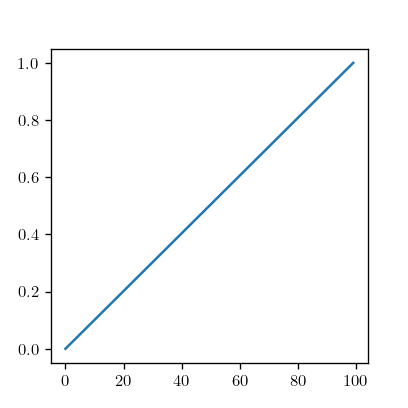

In [13]:
alpha_span = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=figsize_map, dpi=120)
ax.plot(alpha_span)

In [14]:
np.linspace(0,1,3) + np.linspace(0,1,3)*1j

array([0. +0.j , 0.5+0.5j, 1. +1.j ])

### Euclidean distance eigenvectors

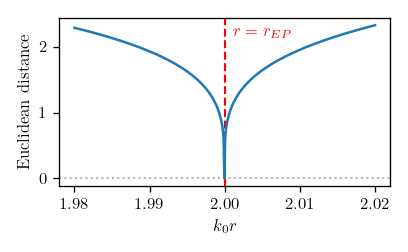

In [15]:
file = np.load("../data/eigs_n4.npz")
saveplot = "../data/euclideandistance.pdf"
rspan = file["rspan"]
eigvs = file["eigvs"]

distance = np.zeros(len(rspan))
for k in range(len(rspan)):
    for i in range(np.shape(eigvs)[1]):
        for j in range(i+1, np.shape(eigvs)[1]):
            distance[k] += la.norm(eigvs[k,:,i]-eigvs[k,:,j])

plt.figure(figsize=figsize, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(rspan[int(len(rspan)/2)], c='red', ls='--', lw=1.3)
plt.plot(rspan, distance, '-', c='C0')
plt.text(2.0011, 2.17, "$r=r_{EP}$", c='red')
plt.xlabel("$k_0r$")
plt.ylabel("Euclidean distance")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

Sol used:

sol = ComplexF64[-46.39937343108954 - 18.90058731508439im, 5.447492370746109 - 13.885801657331122im, 6.860469392719128 + 18.432874756207163im, -22.38728742001199 + 21.025300470722396im]

ftol = 1.0e-20
residual_norm = 2.4099548727191465e-17
FF(alphas) = ComplexF64[-8.218630134997239e-22 - 1.595332783391415e-21im, 6.776263578034403e-20 + 6.776263578034403e-20im, -2.6020852139652106e-18 - 1.734723475976807e-18im, -2.0816681711721685e-17 - 1.214306433183765e-17im]

### power output r and omega

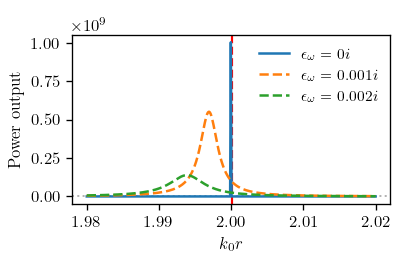

In [16]:
file = np.load("../data/poweroveromega_n4_imagomegashift.npz")
saveplot = "../data/poweroveromega_n4_imagomegashift.pdf"
rspan = file["rspan"]
omegaspan = file["omegaspan"]
Pout = file["Pout"]

plt.figure(figsize=figsize_mod, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(rspan[int(len(rspan)/2)], c='red', ls='--', lw=1.3)
# plt.plot(rspan, Pout[:, 0], '--', c='C0', label="$\epsilon_\omega=-0.002i$")
# plt.plot(rspan, Pout[:, 100], '--', c='C1', label="$\epsilon_\omega=-0.001i$")
plt.plot(rspan, 6e-26*Pout[:, 200], '-', c='C0', label="$\epsilon_\omega=0i$")
plt.plot(rspan, Pout[:, 300], '--', c='C1', label="$\epsilon_\omega=0.001i$")
plt.plot(rspan, Pout[:, 400], '--', c='C2', label="$\epsilon_\omega=0.002i$")
# plt.xlim(2-0.011, 2+0.011)
# plt.text(1.99, 0.93*1e9, "$r=r_{EP}$", c='black')
plt.xlabel("$k_0r$")
plt.ylabel("Power output")
plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

Sol used:

sol = ComplexF64[5.4477774206163145 - 13.885510026031486im, 6.860020877447687 + 18.4327250661243im, -22.387418450548374 + 21.02546310488728im, -46.39542165136222 - 18.899650335002345im]

ftol = 1.0e-20
residual_norm = 9.69739903612216e-19
FF(alphas) = ComplexF64[6.303469119388311e-22 - 1.7827228252993073e-21im, 4.0657581468206416e-20 + 2.710505431213761e-20im, -8.673617379884035e-19 + 4.336808689942018e-19im, 0.0 + 0.0im]

### active/passive alphas

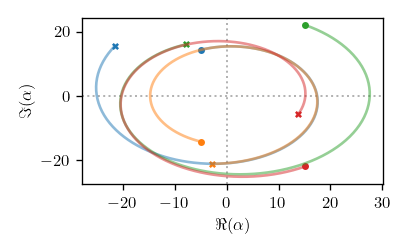

In [125]:
file = np.load("../data/alphas.npz")
saveplot = "../data/alphas.pdf"
alphas = file["alphas"]

ineq = 4*np.pi * np.imag(alphas)/np.abs(alphas)**2 - 1

plt.figure(figsize=figsize, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(0, c='0.7', ls='dotted', lw=1.2)
colors = ['C0','C1','C2','C3']
for i in range(np.shape(alphas)[1]):
    plt.plot(alphas.real[:,i], alphas.imag[:,i], c=colors[i], lw=1.6, alpha=0.5)
    plt.scatter(alphas.real[0,i], alphas.imag[0,i], marker='o', s=10, c=colors[i])
    plt.scatter(alphas.real[-1,i], alphas.imag[-1,i], marker='x', s=10, c=colors[i])
plt.xlabel("$\\Re(\\alpha)$")
plt.ylabel("$\\Im(\\alpha)$")
# plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

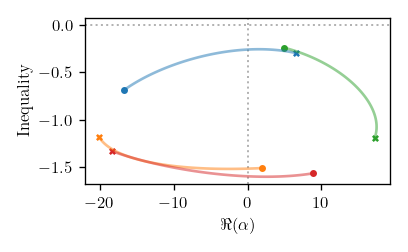

In [122]:
file = np.load("../data/alphas.npz")
saveplot = "../data/alphas.pdf"
alphas = file["alphas"]

ineq = 4*np.pi * np.imag(alphas)/np.abs(alphas)**2 - 1

plt.figure(figsize=figsize, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(0, c='0.7', ls='dotted', lw=1.2)
colors = ['C0','C1','C2','C3']
for i in range(np.shape(alphas)[1]):
    plt.plot(alphas.real[:,i], ineq[:,i], c=colors[i], lw=1.6, alpha=0.5)
    plt.scatter(alphas.real[0,i], ineq[0,i], marker='o', s=10, c=colors[i])
    plt.scatter(alphas.real[-1,i], ineq[-1,i], marker='x', s=10, c=colors[i])
plt.xlabel("$\\Re(\\alpha)$")
plt.ylabel("Inequality")
# plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

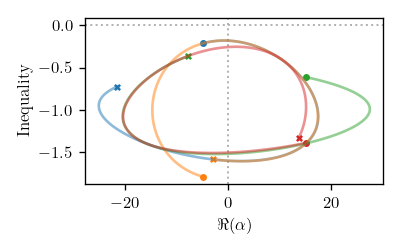

In [123]:
file = np.load("../data/alphas.npz")
saveplot = "../data/alphas.pdf"
alphas = file["alphas"]

ineq = 4*np.pi * np.imag(alphas)/np.abs(alphas)**2 - 1

plt.figure(figsize=figsize, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
plt.axvline(0, c='0.7', ls='dotted', lw=1.2)
colors = ['C0','C1','C2','C3']
for i in range(np.shape(alphas)[1]):
    plt.plot(alphas.real[:,i], ineq[:,i], c=colors[i], lw=1.6, alpha=0.5)
    plt.scatter(alphas.real[0,i], ineq[0,i], marker='o', s=10, c=colors[i])
    plt.scatter(alphas.real[-1,i], ineq[-1,i], marker='x', s=10, c=colors[i])
plt.xlabel("$\\Re(\\alpha)$")
plt.ylabel("Inequality")
# plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

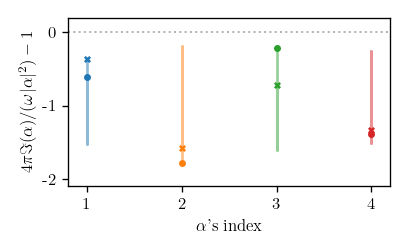

In [10]:
file = np.load("../data/alphas.npz")
saveplot = "../data/alphas.pdf"
alphas = file["alphas"]

ineq = 4*np.pi * np.imag(alphas)/np.abs(alphas)**2 - 1

plt.figure(figsize=figsize, dpi=120)
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
colors = ['C0','C1','C2','C3']
for i in range(np.shape(alphas)[1]):
    plt.plot(np.ones(np.shape(alphas)[0])*(i+1), ineq[:,i], c=colors[i], lw=1.6, alpha=0.5)
    plt.scatter(i+1, ineq[0,i], marker='o', s=10, c=colors[i])
    plt.scatter(i+1, ineq[-1,i], marker='x', s=10, c=colors[i])
plt.xlabel("$\\alpha$'s index")
plt.ylabel("$4\\pi\\Im(\\alpha)/(\\omega|\\alpha|^2) - 1$")
plt.xlim([0.8, 4.2])
plt.ylim([-2.1, 0.2])
plt.yticks([-2,-1,0], ["-2", "-1", "0"])
# plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
# plt.savefig(saveplot)
plt.show()

In [ ]:
file = np.load("../data/alphas.npz")
saveplot = "../data/alphas.gif"
omegashift = file["omega"]
alphas = file["alphas"]

ineq = 4*np.pi * np.imag(alphas)/np.abs(alphas)**2 - 1

fig, ax = plt.subplots(figsize=figsize, dpi=120)
plt.gcf().set_facecolor("white") # set white background
plt.axhline(0, c='0.7', ls='dotted', lw=1.2)
y1_init, = plt.plot(1, ineq[0,0], marker='.', c="C0", alpha=0.2)
y2_init, = plt.plot(2, ineq[0,1], marker='.', c="C1", alpha=0.2)
y3_init, = plt.plot(3, ineq[0,2], marker='.', c="C2", alpha=0.2)
y4_init, = plt.plot(4, ineq[0,3], marker='.', c="C3", alpha=0.2)
time_init = plt.text(0.02, 0.18, "t = 0", c='k', transform = ax.transAxes)
omegashift_init = plt.text(0.02, 0.05, "$\\Im(\\omega) = 0$", c='k', transform = ax.transAxes)
plt.xlabel("$\\alpha$'s index")
plt.ylabel("$4\\pi\\Im(\\alpha)/(\\omega|\\alpha|^2) - 1$")
plt.xlim([0.8, 4.2])
plt.ylim([-2.1, 0.2])
plt.yticks([-2,-1,0], ["-2", "-1", "0"])

n_frames = np.shape(alphas)[0]
def animate(i):
    i_time = int(i/n_frames*100)
    y1_init.set_data(1, ineq[:i,0])
    y2_init.set_data(2, ineq[:i,1])
    y3_init.set_data(3, ineq[:i,2])
    y4_init.set_data(4, ineq[:i,3])
    time_init.set_text("t = {0:d}".format(i_time))
    omegashift_init.set_text("$\\Im(\\omega)$ = {0:.2f}".format(omegashift[i]))
    return y1_init, y2_init, y3_init, y4_init, time_init, omegashift_init 

_animation = animation.FuncAnimation(fig, animate, frames=n_frames, interval=500, blit=True)
plt.tight_layout()
plt.show()

writer = animation.PillowWriter(fps=5)
_animation.save(saveplot, writer=writer)